In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Visualize Average Number of Rainy Days by Month 2020-2023

In [2]:
data = pd.read_csv("NOAA_precipitation_data.csv", skiprows=1)
noaa = data.iloc[:, [0, 4]]
noaa.dropna
noaa.loc[:, 'Date'] = pd.to_datetime(noaa.loc[:, 'Date'])
noaa

,Date,PRCP (Inches)
0,2019-12-01 00:00:00,0.00
1,2019-12-02 00:00:00,0.72
2,2019-12-03 00:00:00,0.39
3,2019-12-04 00:00:00,0.00
4,2019-12-05 00:00:00,0.03
...,...,...
1423,2023-10-26 00:00:00,0.00
1424,2023-10-27 00:00:00,0.00
1425,2023-10-28 00:00:00,0.00
1426,2023-10-29 00:00:00,0.03


In [3]:
PRCP = {}
for i in noaa.index:
    y = noaa.loc[i, "Date"].year
    m = noaa.loc[i, "Date"].month
    prcp = noaa.loc[i, "PRCP (Inches)"]
    if y not in PRCP.keys():
        PRCP[y] = {}
    if m not in PRCP[y].keys():
        PRCP[y][m] = []
    PRCP[y][m].append(prcp)

In [4]:
summary_PRCP = {}
summary_PRCP = summary_PRCP.fromkeys(PRCP.keys(), {})

for y in summary_PRCP.keys():
    summary_PRCP[y] = summary_PRCP[y].fromkeys(PRCP[y])
    for m in summary_PRCP[y].keys():
        temp = np.array(PRCP[y][m])
        num_prcp = np.where(np.array(PRCP[y][m]) >= 0.1)[0].shape[0]
        summary_PRCP[y][m] = num_prcp

In [5]:
summary_PRCP_df = pd.DataFrame(summary_PRCP).iloc[:, 1:]
summary_PRCP_df

,2020,2021,2022,2023
12,7,9,8,NaN
1,4,5,7,9.0
2,9,10,8,4.0
3,9,4,8,7.0
4,9,5,8,8.0
5,7,8,9,2.0
6,6,8,6,8.0
7,8,10,3,11.0
8,12,6,6,9.0
9,4,8,7,11.0


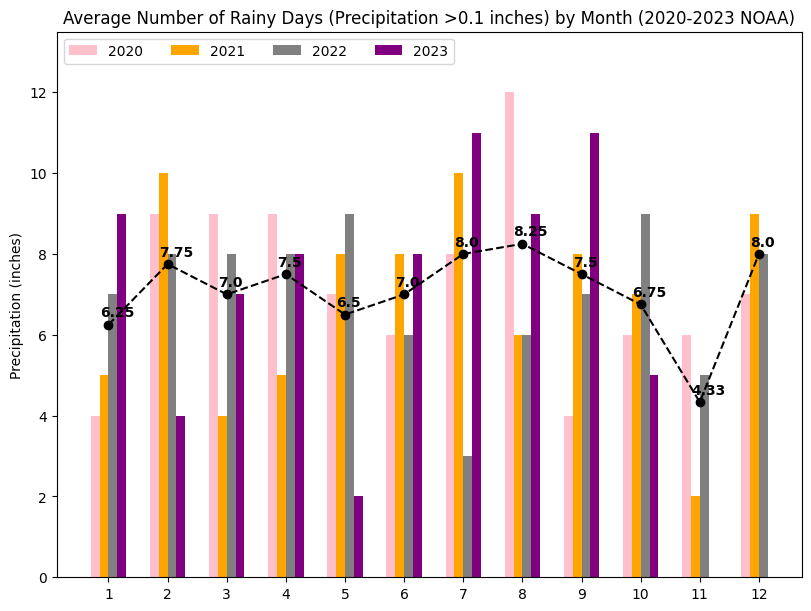

In [6]:
width = 0.15  # the width of the bars

fig, ax = plt.subplots(layout='constrained', figsize=(8, 6))

avg_lst = []

col_lst = ['pink', 'orange', 'grey', 'purple']

for m in summary_PRCP_df.index:
    avg = summary_PRCP_df.loc[m, :].mean()
    avg_lst.append(avg)
    
    multiplier = 0
    for y in summary_PRCP_df.columns:
    
        offset = width * multiplier
        rects = ax.bar(m - 1 - 0.225 + offset, summary_PRCP_df.loc[m, y], width, color=col_lst[multiplier], label=y if (m == 1) else "")
        multiplier += 1

a = avg_lst[0]
b = avg_lst[1:]
b.append(a)

ax.plot(b, '--ko')

for i in range(len(b)):
    ax.annotate(round(b[i], 2), (i - 0.15, b[i] + 0.2), weight='bold')

ax.set_ylim([0, 13.5])
ax.set_xticks(np.arange(0, 12))
ax.set_xticklabels(np.arange(1, 13))

ax.set_title("Average Number of Rainy Days (Precipitation >0.1 inches) by Month (2020-2023 NOAA)")
ax.set_ylabel("Precipitation (inches)")
ax.legend(loc='upper left', ncols=4)
plt.show()

# Generate Ramdom Rainy Dates from 11/01/2023

In [7]:
num_rainy_days = np.ceil(b).astype(int)
num_rainy_days

array([7, 8, 7, 8, 7, 7, 8, 9, 8, 7, 5, 8])

In [8]:
from datetime import datetime
from datetime import timedelta

In [9]:
seed = 6

increment = timedelta(days=1)

start_date = datetime(2023, 11, 1)
end_date = datetime(2025, 10, 31)

In [10]:
rain_dict = {}

cursor_date = start_date

while cursor_date <= end_date:
    
    y = cursor_date.year
    if not y in rain_dict.keys():
        rain_dict[y] = {}
        
    m = cursor_date.month
    if not m in rain_dict[y].keys():
        rain_dict[y][m] = {"date":[], "rain_status":[]}
        
    rain_dict[y][m]["date"].append(cursor_date)
    rain_dict[y][m]["rain_status"].append(0)
    
    cursor_date += increment

In [11]:
np.random.seed(seed)

for y in rain_dict.keys():
    for i in range(len(num_rainy_days)):
        try:
            total_days = len(rain_dict[y][i+1]['rain_status'])
            rain_dict[y][i+1]['rain_day_indices'] = np.random.choice(total_days, num_rainy_days[i], replace=False)
        except:
            pass

In [12]:
year = 2025
month = 5
rainy_day_indices = rain_dict[year][month]['rain_day_indices']
rainy_day = np.array(rain_dict[year][month]['date'])[rainy_day_indices]
rainy_day

array([datetime.datetime(2025, 5, 23, 0, 0),
       datetime.datetime(2025, 5, 1, 0, 0),
       datetime.datetime(2025, 5, 21, 0, 0),
       datetime.datetime(2025, 5, 25, 0, 0),
       datetime.datetime(2025, 5, 3, 0, 0),
       datetime.datetime(2025, 5, 27, 0, 0),
       datetime.datetime(2025, 5, 5, 0, 0)], dtype=object)

# Calculate Duration

In [13]:
start = datetime(2024, 10, 30)
end = datetime(2025, 3, 13)

span = end - start
span

datetime.timedelta(days=134)